In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

validation = tf.keras.preprocessing.image_dataset_from_directory(
    "validation",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [4]:
class_names= dataset.class_names
class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [5]:
len(dataset)

469

In [6]:
for image_batch,label_batch in dataset.take(1):   # dataset.take(1) gives one batch ; 32 batch size , 256,256 image size ; 3 RGB channels
    print(image_batch.shape)
    print(label_batch.numpy())                    # label is from 0 to 9 bcuz 10 types of diseases

(32, 256, 256, 3)
[ 4  5 14  4  0  4  0  8  7  5  3 11  9  3 12 14 14  2 12 10  5  5  8  3
 10  4 11  6  4  3  9  6]


In [7]:
# explaination

#for image_batch,label_batch in dataset.take(1):   # dataset.take(1) gives one batch
#    print(image_batch[0].numpy())                         # this is tensor convert to numpy using numpy()
    
    # so each batch has 32 images as mentioned

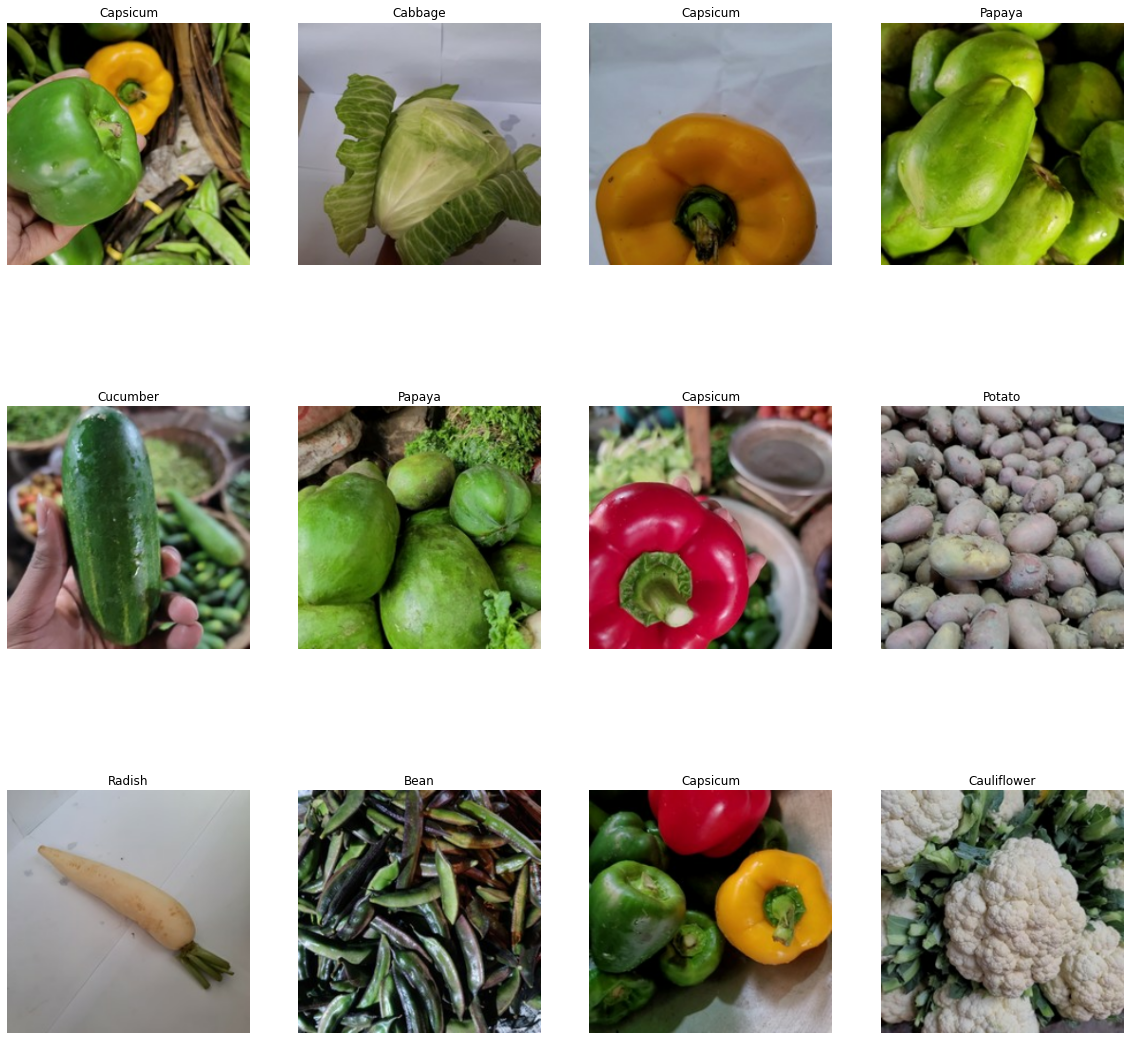

In [10]:
#explaination
plt.figure(figsize=(20,20))                        # comment and show pics ooverlap
for image_batch,label_batch in dataset.take(1):   # dataset.take(1) gives one batch
    for i in range(12):                                      # for checking 12 images together
        ax=plt.subplot(3,4,i+1)                               # plotting together
        plt.imshow(image_batch[i].numpy().astype("uint8"))   # numpy as float so convert to int
        plt.axis('off')                                    # no need for axis 
        plt.title(class_names[label_batch[i]])             # label batch to know which category of image and class_names[] for its name
  

In [11]:
len(dataset)

469

In [12]:
# splitting to train,validation and test

In [13]:
train_size=1
len(dataset)*train_size

469

In [15]:
train_ds=dataset.take(469)
len(train_ds)

469

In [17]:
test_ds= test
len(test_ds)

94

In [18]:
val_size=1
len(validation)*val_size

94

In [19]:
val_ds=validation
len(val_ds)

94

In [20]:
# test_ds=test_ds.skip(50)
# len(test_ds)

In [21]:
# splitting data into train_ds,val_ds,test_ds

In [18]:
# # converting hardcode to split using function

# def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
#     ds_size=len(ds)
    
#     if shuffle:
#         ds=ds.shuffle(shuffle_size,seed=1)
#     train_size=int(train_split*ds_size)
#     val_size=int(val_split*ds_size)
    
#     train_ds=ds.take(train_size)
    
#     val_ds=ds.skip(train_size).take(val_size)
#     test_ds=ds.skip(train_size).skip(val_size)
    
#     return train_ds,val_ds,test_ds

In [19]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

469

In [23]:
len(val_ds)

94

In [24]:
len(test_ds)

94

In [25]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [36]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
469/469 [==============================] - 826s 2s/step - loss: 2.0691 - accuracy: 0.2566 - val_loss: 1.4943 - val_accuracy: 0.4617
Epoch 2/10
469/469 [==============================] - 866s 2s/step - loss: 1.2746 - accuracy: 0.5481 - val_loss: 1.0080 - val_accuracy: 0.6353
Epoch 3/10
469/469 [==============================] - 820s 2s/step - loss: 0.8917 - accuracy: 0.6852 - val_loss: 0.7546 - val_accuracy: 0.7270
Epoch 4/10
469/469 [==============================] - 839s 2s/step - loss: 0.6836 - accuracy: 0.7582 - val_loss: 0.5801 - val_accuracy: 0.7860
Epoch 5/10
469/469 [==============================] - 870s 2s/step - loss: 0.5465 - accuracy: 0.8071 - val_loss: 0.4451 - val_accuracy: 0.8440
Epoch 6/10
469/469 [==============================] - 806s 2s/step - loss: 0.4510 - accuracy: 0.8405 - val_loss: 0.5571 - val_accuracy: 0.7997
Epoch 7/10
469/469 [==============================] - 797s 2s/step - loss: 0.3909 - accuracy: 0.8663 - val_loss: 0.3682 - val_accuracy: 0.8627

In [40]:
scores=model.evaluate(test_ds)
scores

94/94 [==============================] - 45s 448ms/step - loss: 0.1987 - accuracy: 0.9347


[0.19867265224456787, 0.9346666932106018]

In [41]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

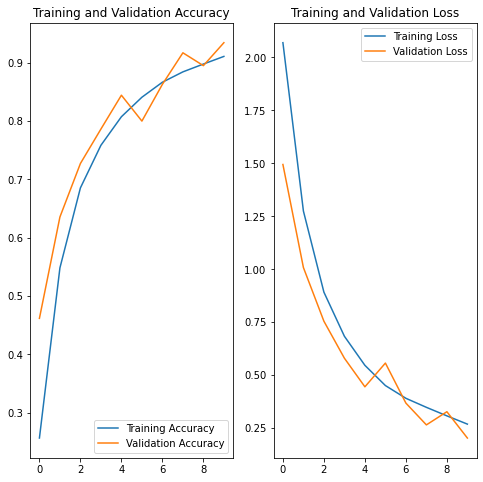

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pumpkin
1/1 [==============================] - 1s 776ms/step
predicted label: Broccoli


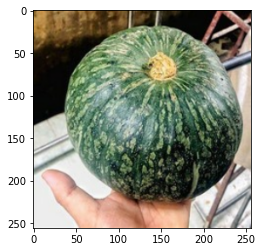

In [43]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


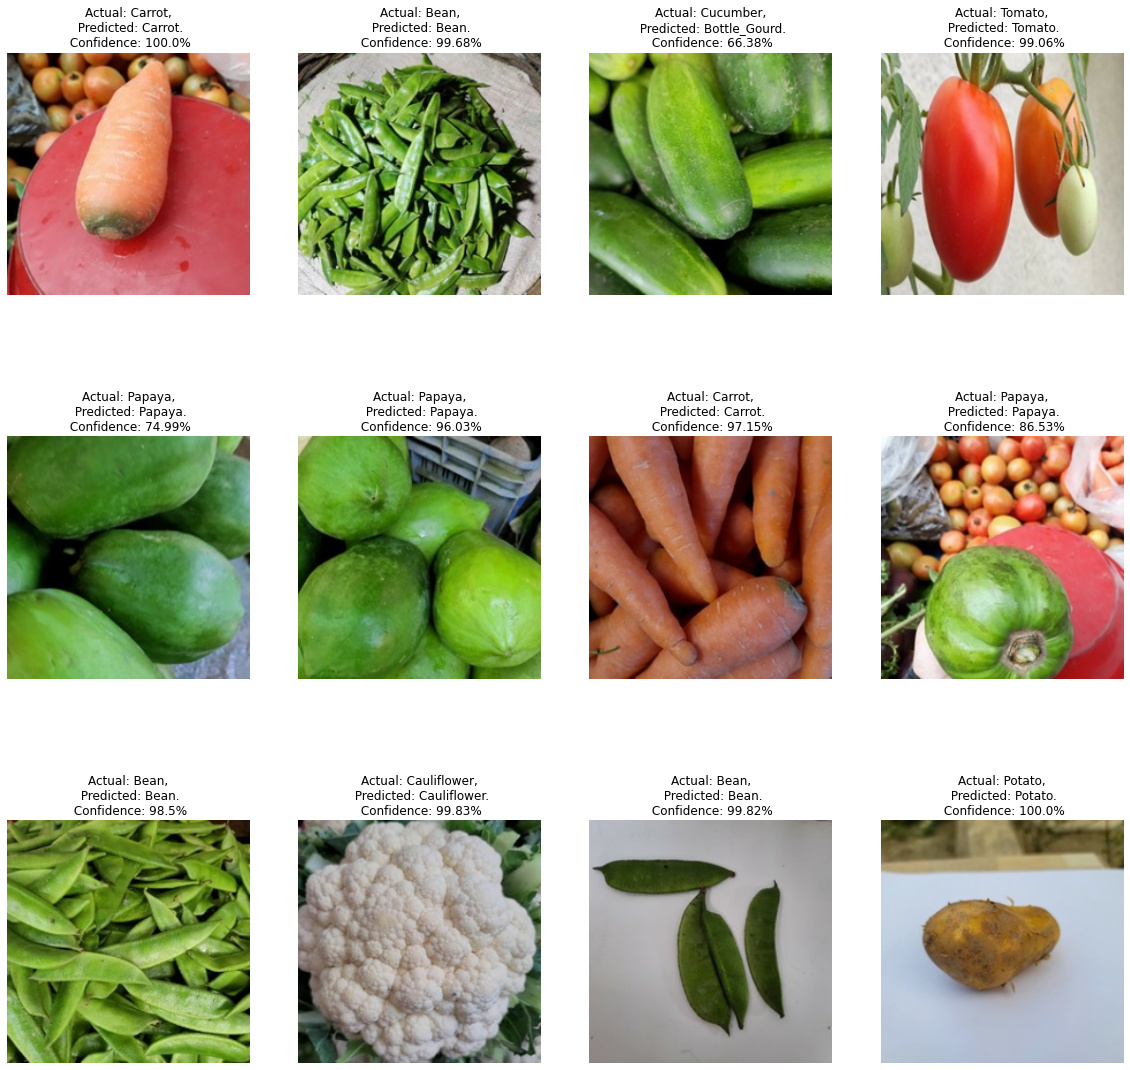

In [45]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [56]:
# import os
# model_version = max([int(i) for i in os.listdir('C:/Users/patil/OneDrive/Desktop/New folder/saved_models')+[0]])+1
# model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/1\assets


INFO:tensorflow:Assets written to: ../saved_models/1\assets


In [59]:
import os
model_version = os.listdir('C:/Users/patil/OneDrive/Desktop/New folder/saved_models')
model.save(f"C:/Users/patil/OneDrive/Desktop/New folder/saved_models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/patil/OneDrive/Desktop/New folder/saved_models/[]\assets


INFO:tensorflow:Assets written to: C:/Users/patil/OneDrive/Desktop/New folder/saved_models/[]\assets
